# 1. Setup

## 1.1 Imports

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
import tensorflow as tf
import tensorboard
import Utils
import datetime

Using TensorFlow backend.


## 1.2 Set random seeds

In [2]:
np.random.seed(117)
tf.set_random_seed(117)

## 1.3 Global variables

In [3]:
img_width = 100
img_height = 100
img_channels = 3

# 2. Carga de datos

In [4]:
bees, bees_test_for_evaluation = Utils.read_data()

In [5]:
bees.head()

,id,datetime,file,location,zip code,subspecies,health,pollen_carrying,caste
0,0,2018-08-06 14:48:00,020_011.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
1,1,2018-08-21 09:00:00,032_507.png,"Des Moines, IA, USA",50315,Russian honey bee,healthy,False,worker
2,2,2018-08-21 09:00:00,032_612.png,"Des Moines, IA, USA",50315,Russian honey bee,healthy,False,worker
3,3,2018-08-17 17:50:00,030_773.png,"Alvin, TX, USA",77511,Italian honey bee,ant problems,False,worker
4,4,2018-08-06 13:19:00,015_1052.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker


In [6]:
bees_test_for_evaluation.head()

,id,datetime,file,location,zip code,pollen_carrying,caste
0,0,2018-08-28 16:07:00,042_012.png,"Alvin, TX, USA",77511,False,worker
1,1,2018-08-10 13:54:00,022_114.png,"Saratoga, CA, USA",95070,False,worker
2,2,2018-08-18 12:30:00,038_384.png,"Athens, Georgia, USA",30607,False,worker
3,3,2018-08-17 17:50:00,030_740.png,"Alvin, TX, USA",77511,False,worker
4,4,2018-07-07 12:56:00,005_310.png,"Saratoga, CA, USA",95070,False,worker


# 3. Análisis exploratorio de datos

## 3.1 Análisis descriptivo: Distribuciones, Scatterplots, Barplots...

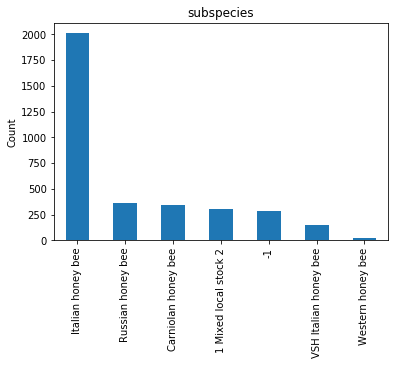

In [7]:
Utils.value_counts(bees, 'subspecies')

In [8]:
bees_test_for_evaluation

,id,datetime,file,location,zip code,pollen_carrying,caste
0,0,2018-08-28 16:07:00,042_012.png,"Alvin, TX, USA",77511,False,worker
1,1,2018-08-10 13:54:00,022_114.png,"Saratoga, CA, USA",95070,False,worker
2,2,2018-08-18 12:30:00,038_384.png,"Athens, Georgia, USA",30607,False,worker
3,3,2018-08-17 17:50:00,030_740.png,"Alvin, TX, USA",77511,False,worker
4,4,2018-07-07 12:56:00,005_310.png,"Saratoga, CA, USA",95070,False,worker
...,...,...,...,...,...,...,...
1702,1702,2018-08-06 11:25:00,018_051.png,"Saratoga, CA, USA",95070,False,worker
1703,1703,2018-08-18 12:30:00,038_381.png,"Athens, Georgia, USA",30607,False,worker
1704,1704,2018-08-17 17:50:00,030_809.png,"Alvin, TX, USA",77511,False,worker
1705,1705,2018-08-19 12:46:00,010_419.png,"Des Moines, IA, USA",50315,False,worker


## 3.2 Ver imágenes

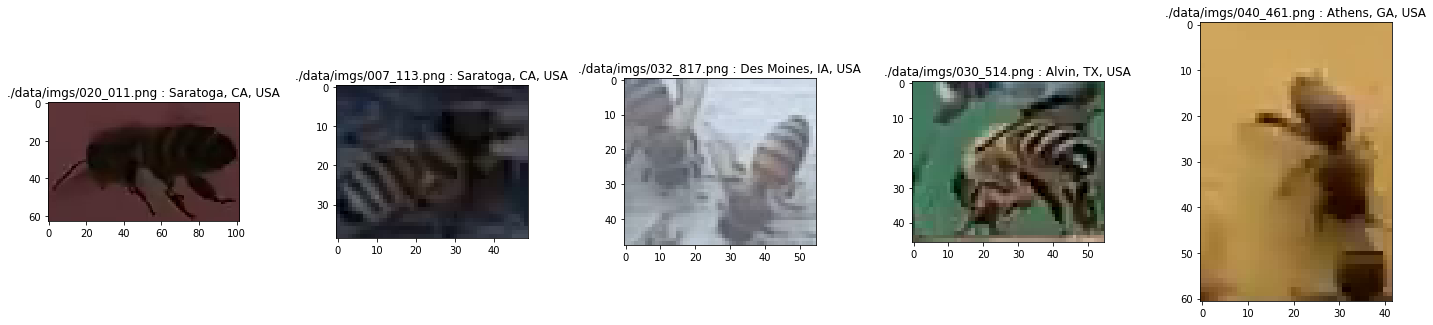

In [9]:
Utils.plot_images(bees, 'location', [0, 18, 24, 38, 45])

# 4. Clasificación

## 4.1. Data preprocessing
### 4.1.1 Particionamiento

In [10]:
train_bees, val_bees, test_bees = Utils.split(bees)
train_bees

,id,datetime,file,location,zip code,subspecies,health,pollen_carrying,caste
225,225,2018-08-06 13:19:00,015_996.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
2453,2453,2018-08-06 13:19:00,015_895.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
3009,3009,2018-08-21 15:56:00,040_526.png,"Athens, GA, USA",30607,Italian honey bee,"few varrao, hive beetles",False,worker
3270,3270,2018-08-19 12:46:00,010_123.png,"Des Moines, IA, USA",50315,Carniolan honey bee,healthy,False,worker
2622,2622,2018-08-10 13:54:00,022_361.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
...,...,...,...,...,...,...,...,...,...
1275,1275,2018-08-28 16:07:00,042_004.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1439,1439,2018-08-06 19:19:00,019_1195.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
1175,1175,2018-08-17 17:50:00,030_883.png,"Alvin, TX, USA",77511,Italian honey bee,ant problems,False,worker
2765,2765,2018-08-10 13:54:00,022_379.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker



### 4.1.2 Carga de imágenes

In [11]:
train_X, val_X, test_X, train_y, val_y, test_y = Utils.load_images_and_target(train_bees, 
                                                                              val_bees, 
                                                                              test_bees,
                                                                              'subspecies',
                                                                              img_width, 
                                                                              img_height,
                                                                              img_channels)

In [12]:
train_X /= 255
val_X /= 255
test_X /= 255
train_y /= 255
val_y /= 255
test_y /= 255

## 4.2 CNN

In [13]:
Num_Architecture = 3

model1 = Sequential()
model1.add(Conv2D(8,kernel_size=3,padding='same',activation='relu',input_shape =(img_height, img_width, img_channels))) #capa Conv
model1.add(MaxPool2D(3))

model1.add(Conv2D(4, kernel_size=3, activation='relu', padding='same'))
model1.add(MaxPool2D(3))


#model1.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
#model1.add(MaxPool2D(3))

#model1.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
#model1.add(MaxPool2D(2))
# Add output layer
model1.add(Flatten())
#model1.add(Dropout(rate=0.1)) 

model1.add(Dense(train_y.columns.size, activation = 'softmax'))
model1.summary()






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 4)         292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 484)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 3395      
Total params: 3,911
Trainable params: 3,911
Non-trainable params: 0
_________________________________________________________________


## 4.3 Entrenamiento

### 4.2.2 Parámetros de transformación de imágenes (data augmentation)

In [14]:
rotation_range = 350      # rotación aleatoria en grados entre 0 a rotation_range
zoom_range = 0.10         # zoom aleatorio
width_shift_range = 0.6  # desplazamiento horizontal aleatorio (fracción del total)
height_shift_range = 0.6 # desplazamiento vertical aleatorio (fracción del total)
horizontal_flip = True   # transposición horizontal
vertical_flip = True     # transposición horizontal

In [15]:
optimizer = 2 #1 Adam, 2 Sgd
loss = 'categorical_crossentropy'
steps_per_epoch = 60
patience = 40
class_weights = Utils.class_weights(bees, 'subspecies')

In [16]:
class_weights

array([ 1.75531915,  1.64451827,  1.43895349,  0.24626866,  1.375     ,
        3.39041096, 22.5       ])

In [17]:
Iteration = 1

for lr in [0.1,0.001]:
    for batch_size in [100, 150,200]:
        steps_per_epoch = steps_per_epoch * 1.5
        for  epochs in [ 80, 100]:
            StartTime = datetime.datetime.now()
            print("")
            print("--------------------------------Inicio----------------------------------------")
            print("StartTime: ", StartTime.strftime("%Y%m%d-%H%M%S") , ' lr:', lr,' batch:', batch_size, "epochs: ", epochs , " inicio iteracion: ", Iteration )
            print("")

            training1, model1 = Utils.train(Num_Architecture,Iteration ,
                                            model1,
                                            train_X,
                                            train_y, 
                                            batch_size = batch_size,
                                            epochs = epochs,
                                            validation_data_X = val_X, 
                                            validation_data_y = val_y,
                                            steps_per_epoch = steps_per_epoch,
                                            rotation_range = rotation_range,
                                            zoom_range = zoom_range, 
                                            width_shift_range = width_shift_range,
                                            height_shift_range = height_shift_range,
                                            horizontal_flip = horizontal_flip,  
                                            vertical_flip = vertical_flip,
                                            patience = patience,
                                            class_weights = class_weights,
                                            learn_rate = lr,
                                            StartTime = StartTime,
                                            Optimizer = optimizer)

            print("")
            Utils.eval_model(training1, model1, test_X, test_y, 'subspecies')
            print("StartTime: ", StartTime.strftime("%Y%m%d-%H%M%S") , ' lr:', lr,' batch:', batch_size, "epochs: ", epochs , " Fin iteracion: ", Iteration )
            print("-------------------------------FIN-----------------------------------------")
            print("")
            Iteration = Iteration + 1
            patience = patience * 1.5
    steps_per_epoch = 40
    patience = 35



--------------------------------Inicio----------------------------------------
StartTime:  20191116-121849  lr: 0.1  batch: 100 epochs:  80  inicio iteracion:  1



C:\Users\drodr\.conda\envs\keras-gpuP36\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


ValueError: Too large work array required -- computation cannot be performed with standard 32-bit LAPACK.

## 4.3 Evaluación del modelo

In [ ]:
Utils.eval_model(training1, model1, test_X, test_y, 'subspecies')